In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, InputLayer, MaxPooling2D, Dropout
from keras.losses import SparseCategoricalCrossentropy
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn import preprocessing

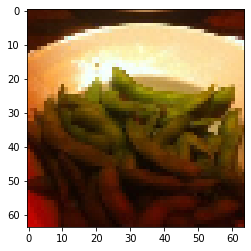

In [ ]:
file_train = 'food-101/food_c101_n10099_r64x64x3.h5'
file_test = 'food-101/food_test_c101_n1000_r64x64x3.h5'

train_data = h5py.File(file_train, 'r')
test_data = h5py.File(file_test, 'r')


x_train = train_data['images']
x_train = np.asarray(x_train)
x_train = x_train.astype('float32') / 255.

y_train = train_data['category']
y_train = np.where(y_train[...] == True) [1]
y_train = y_train.astype('uint8')

catagory_names = train_data['category_names']

x_test = test_data['images']
x_test = np.asarray(x_test)
x_test = x_test.astype('float32') / 255.

y_test = test_data['category']
y_test = np.where(y_test[...] == True) [1]
y_test = y_test.astype('uint8')

plt.imshow(x_train[0])
plt.show()



In [ ]:
# LeNet-5 Convolutional Neural Network
LeNet5 = keras.Sequential(name='LeNet-5')
LeNet5.add(InputLayer(input_shape=(64, 64, 3)))
LeNet5.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='same', name='C1'))
LeNet5.add(AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid', name='A1'))
LeNet5.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh', name='C2'))
LeNet5.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='A2'))
LeNet5.add(Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid', name='C3'))
LeNet5.add(Flatten(name='F'))
LeNet5.add(Dense(units=200, activation='tanh', name='D1'))
LeNet5.add(Dropout(0.4))
LeNet5.add(Dense(units=200, activation='tanh', name='D2'))
LeNet5.add(Dropout(0.4))
LeNet5.add(Dense(units=101, activation='softmax', name='O'))

LeNet5.summary()

Model: "LeNet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 64, 64, 6)         456       
_________________________________________________________________
A1 (AveragePooling2D)        (None, 63, 63, 6)         0         
_________________________________________________________________
C2 (Conv2D)                  (None, 59, 59, 16)        2416      
_________________________________________________________________
A2 (AveragePooling2D)        (None, 29, 29, 16)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 25, 25, 120)       48120     
_________________________________________________________________
F (Flatten)                  (None, 75000)             0         
_________________________________________________________________
D1 (Dense)                   (None, 200)               1500

In [ ]:
LeNet5.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = LeNet5.fit(x_train, y_train, batch_size=250, epochs=80, verbose=1, validation_data=(x_test, y_test))

Epoch 1/80
41/41 [==============================] - 2s 57ms/step - loss: 4.9613 - accuracy: 0.0109 - val_loss: 4.6455 - val_accuracy: 0.0080
Epoch 2/80
41/41 [==============================] - 2s 52ms/step - loss: 4.9393 - accuracy: 0.0102 - val_loss: 4.6519 - val_accuracy: 0.0080
Epoch 3/80
41/41 [==============================] - 2s 52ms/step - loss: 4.8918 - accuracy: 0.0110 - val_loss: 4.6498 - val_accuracy: 0.0190
Epoch 4/80
41/41 [==============================] - 2s 53ms/step - loss: 4.8605 - accuracy: 0.0114 - val_loss: 4.6603 - val_accuracy: 0.0040
Epoch 5/80
41/41 [==============================] - 2s 52ms/step - loss: 4.8690 - accuracy: 0.0097 - val_loss: 4.6415 - val_accuracy: 0.0070
Epoch 6/80
41/41 [==============================] - 2s 52ms/step - loss: 4.8381 - accuracy: 0.0100 - val_loss: 4.6482 - val_accuracy: 0.0100
Epoch 7/80
41/41 [==============================] - 2s 53ms/step - loss: 4.8167 - accuracy: 0.0090 - val_loss: 4.6426 - val_accuracy: 0.0100
Epoch 8/80
41

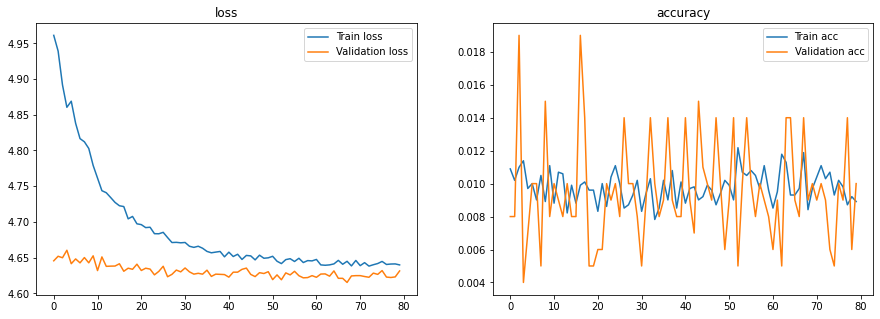

In [ ]:
# Plot loss function and accuracy over each epoch
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[1].set_title('accuracy')
ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
ax[0].legend()
ax[1].legend()

In [55]:
# AlexNet
AlexNet = keras.Sequential(name='AlexNet')
AlexNet.add(InputLayer(input_shape=(64,64,3)))
AlexNet.add(Conv2D(filters=96,  kernel_size=(5,5), strides=(1,1), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
AlexNet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'))
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'))
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(4096, activation='relu'))
AlexNet.add(Dropout(0.4))
AlexNet.add(Dense(4096, activation='relu'))
AlexNet.add(Dropout(0.4))
AlexNet.add(Dense(1000, activation='relu'))
AlexNet.add(Dropout(0.4))
AlexNet.add(Dense(101, activation='softmax'))

AlexNet.summary()

AlexNet.compile(loss=SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])


Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 60, 60, 96)        7296      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 25, 256)       614656    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 384)       885120    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 384)         1327488   
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 6, 6, 256)         8849

In [57]:
history = AlexNet.fit(x_train, y_train, batch_size=250, epochs=80, verbose=1, validation_data=(x_test, y_test))

Epoch 1/80
41/41 [==============================] - 7s 164ms/step - loss: 4.6184 - accuracy: 0.0080 - val_loss: 4.6153 - val_accuracy: 0.0090
Epoch 2/80
41/41 [==============================] - 6s 144ms/step - loss: 4.6145 - accuracy: 0.0119 - val_loss: 4.6161 - val_accuracy: 0.0110
Epoch 3/80
41/41 [==============================] - 6s 142ms/step - loss: 4.6140 - accuracy: 0.0096 - val_loss: 4.6169 - val_accuracy: 0.0060
Epoch 4/80
41/41 [==============================] - 6s 140ms/step - loss: 4.6142 - accuracy: 0.0090 - val_loss: 4.6170 - val_accuracy: 0.0060
Epoch 5/80
41/41 [==============================] - 6s 138ms/step - loss: 4.6135 - accuracy: 0.0108 - val_loss: 4.6184 - val_accuracy: 0.0060
Epoch 6/80
41/41 [==============================] - 6s 137ms/step - loss: 4.6132 - accuracy: 0.0094 - val_loss: 4.6176 - val_accuracy: 0.0080
Epoch 7/80
41/41 [==============================] - 6s 136ms/step - loss: 4.6131 - accuracy: 0.0113 - val_loss: 4.6179 - val_accuracy: 0.0050
Epoch 

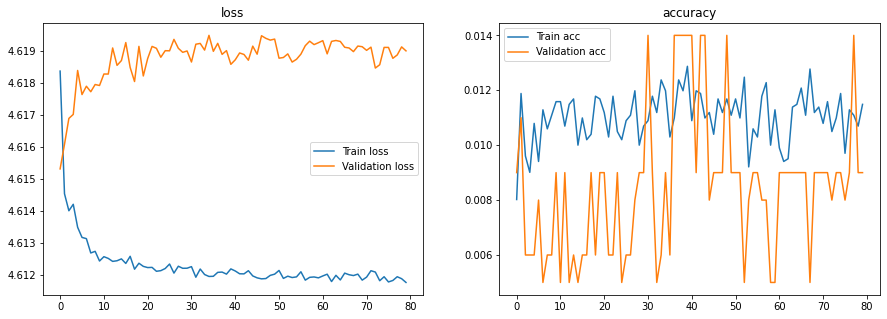

In [58]:
# Plot loss function and accuracy over each epoch
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[1].set_title('accuracy')
ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
ax[0].legend()
ax[1].legend()